In [367]:
#https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

## Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name = 'E Comm')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## EDA

In [4]:
df.shape

(5630, 20)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [7]:
df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


-> There are 5630 rows and 20 columns.<br>
-> There are no duplicate entries.<br>
-> There are certain missing values.<br>
-> There are no anomalies in data types.


In [8]:
for i in df.columns:
  if df[i].dtypes == 'object':
    #print("Column: ",i)
    print(df[i].value_counts())
    print()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64



-> In column PreferredLoginDevice  the categories Mobile phone and phone can be merged into single category. <br>
-> In columnPreferedOrderCat the categories Mobile Phone and Mobile can be merged into single category.<br>
-> In PreferredPaymentMode the categories Credit card and CC can be merged into single category and categories COD and cash on delivery can be merged into single category.

In [10]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df['PreferedOrderCat']=df['PreferedOrderCat'].apply(lambda x: 'Mobile Phone' if x in ['Mobile Phone','Mobile'] else x )
df['PreferredPaymentMode']=df['PreferredPaymentMode'].apply(lambda x: 'Credit Card' if x in ['Credit Card','CC'] else x)
df['PreferredPaymentMode']=df['PreferredPaymentMode'].apply(lambda x: 'Cash on Delivery' if x in ['Cash on Delivery','COD'] else x)

In [377]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,3996
Computer,1634


In [378]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Mobile Phone,2080
Laptop & Accessory,2050
Fashion,826
Grocery,410
Others,264


In [11]:
df['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
Cash on Delivery,514
UPI,414


## Handling the missing values

In [12]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(i,df[i].isnull().sum())

Tenure 264
WarehouseToHome 251
HourSpendOnApp 255
OrderAmountHikeFromlastYear 265
CouponUsed 256
OrderCount 258
DaySinceLastOrder 307


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [14]:
df_missing_values =df[df.isnull().any(axis=1)]
df_missing_values.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [15]:
num_features = [i for i in df.columns if df[i].dtypes != 'object']
num_features

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'CityTier'}>],
       [<Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>,
        <Axes: title={'center': 'SatisfactionScore'}>],
       [<Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>,
        <Axes: title={'center': 'CouponUsed'}>],
       [<Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>, <Axes: >]],
      dtype=object)

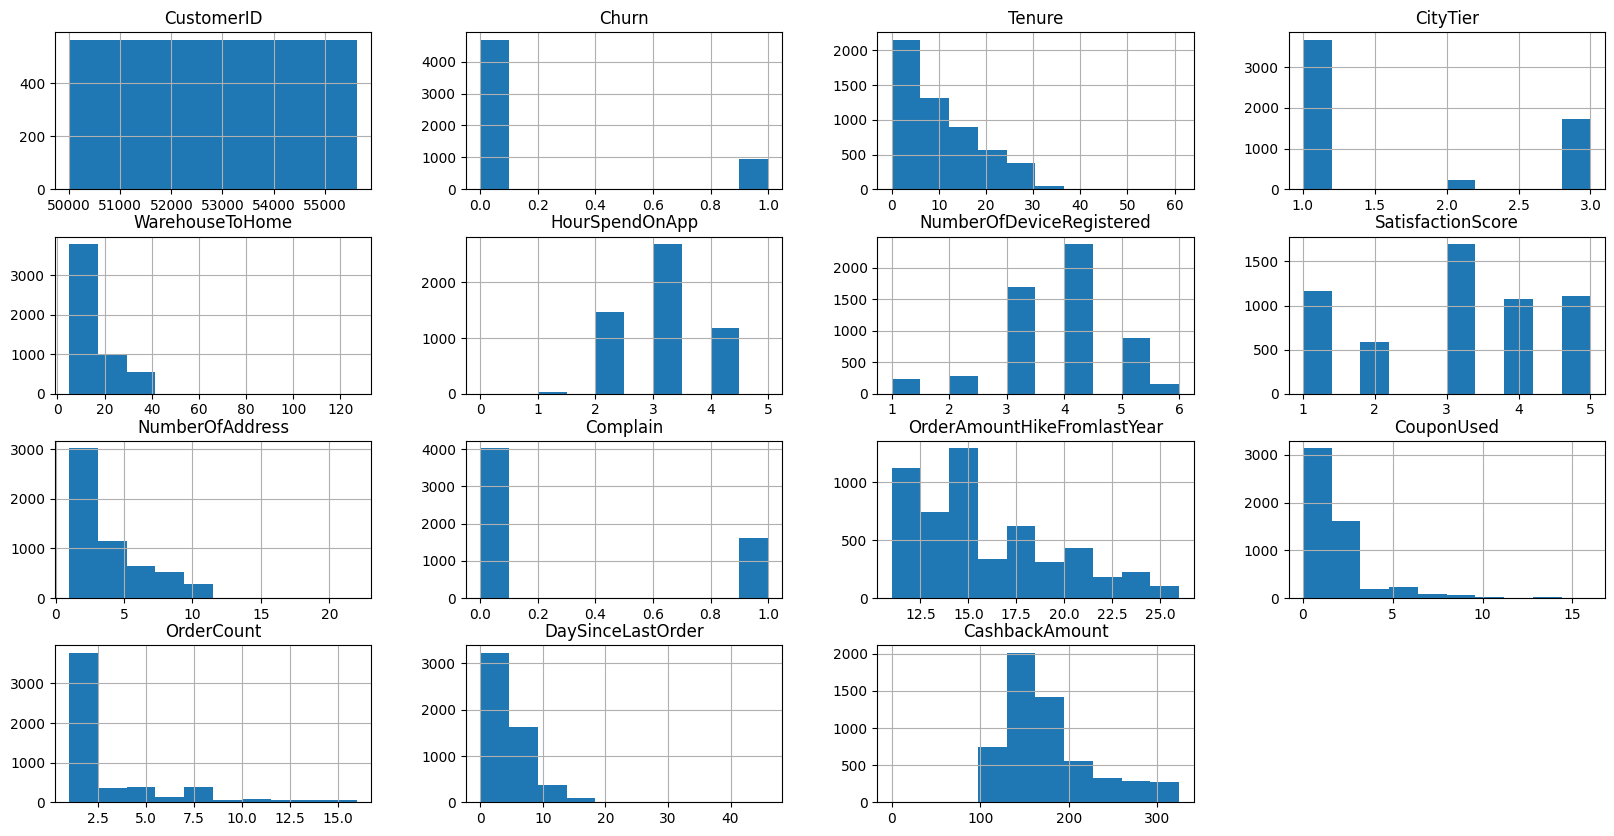

In [16]:
df[num_features].hist(figsize=(20,10))

In [17]:
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome']=df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp']=df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())
df['OrderAmountHikeFromlastYear']=df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed']=df['CouponUsed'].fillna(df['CouponUsed'].mean())
df['OrderCount']=df['OrderCount'].fillna(df['OrderCount'].mean())
df['DaySinceLastOrder']=df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())



In [18]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [19]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.000000,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.931535,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [20]:
df_numeric = df[num_features]

In [21]:
df_numeric.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.000000,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,1,8.0,3.000000,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,1,30.0,2.000000,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.000000,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,2.931535,3,5,3,0,11.0,1.0,1.0,3.0,129.60


In [22]:
corr = df_numeric.corr()

<Axes: >

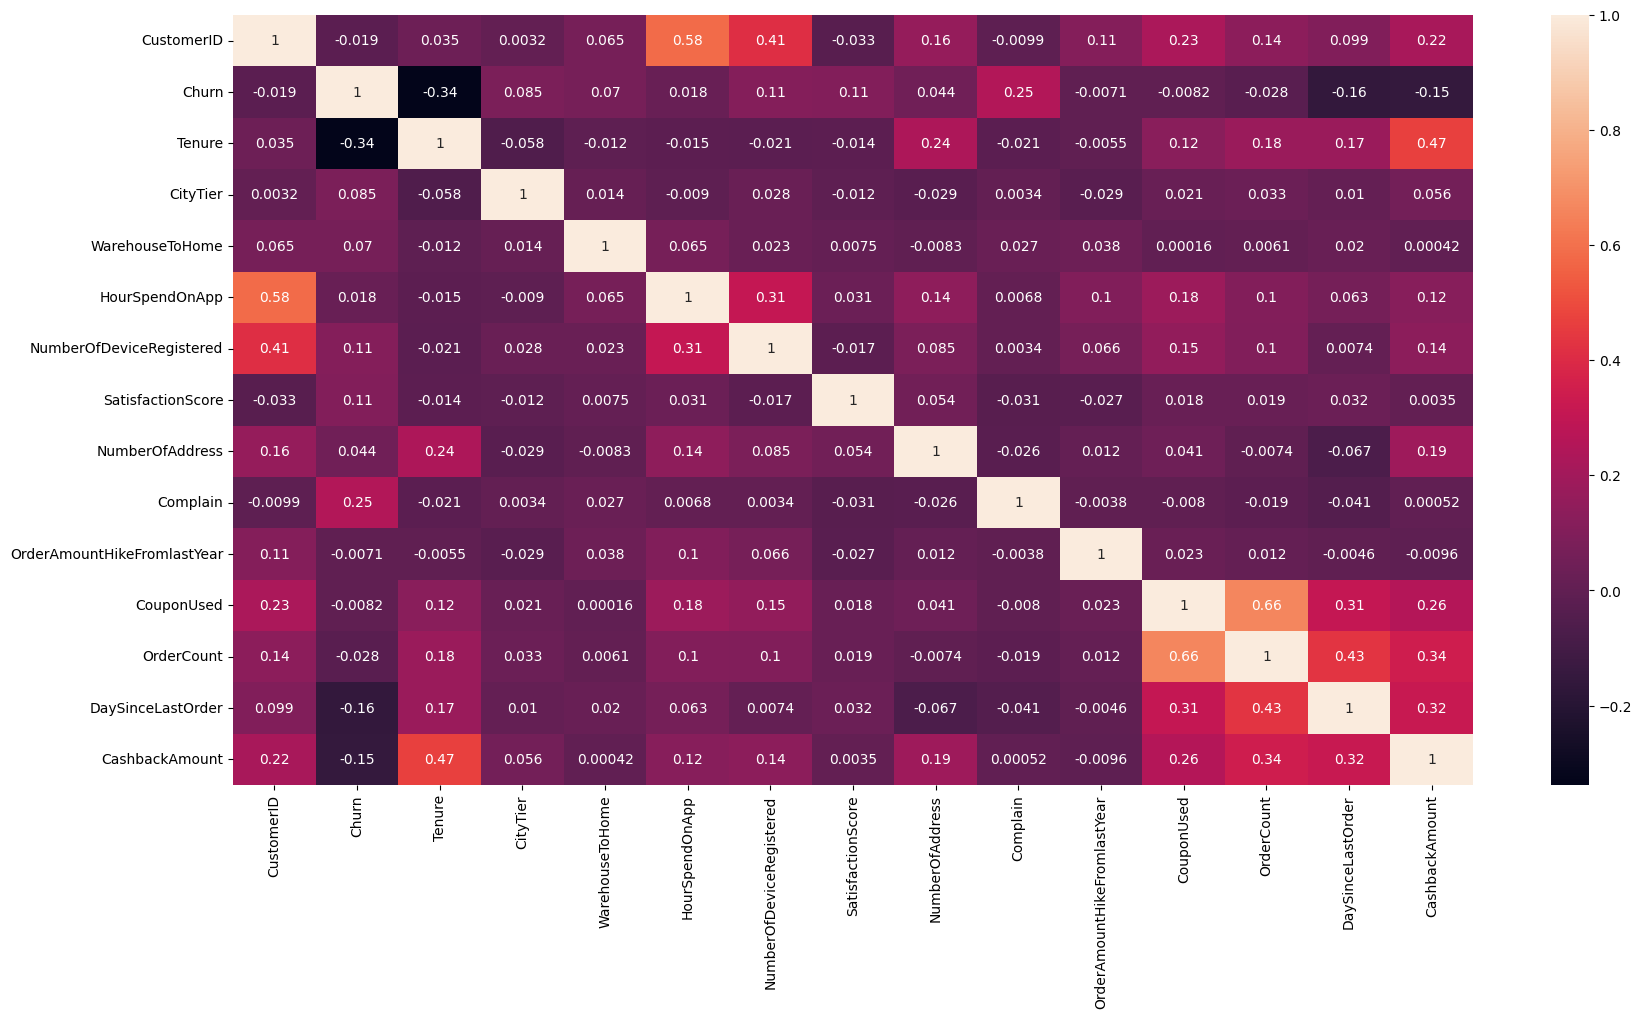

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [24]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


In [25]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.000000,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.931535,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder()

In [28]:
cat_columns = [i for i in df.columns if df[i].dtypes == 'object']
cat_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [29]:
df_encoded_data = pd.DataFrame(encoder.fit_transform(df[cat_columns]).toarray(),columns=encoder.get_feature_names_out())

In [30]:
df_encoded_data.head()

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
df = df.drop(cat_columns,axis = 1)
df = pd.concat([df,df_encoded_data],axis=1)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.000000,3,2,9,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50002,1,9.0,1,8.0,3.000000,4,3,7,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,50003,1,9.0,1,30.0,2.000000,4,3,6,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,50004,1,0.0,3,15.0,2.000000,4,5,8,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,50005,1,0.0,1,12.0,2.931535,3,5,3,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
df.drop('CustomerID',axis=1,inplace=True)

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
X =df.drop('Churn',axis = 1)
y = df['Churn']

In [35]:
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X,y)

In [36]:
df_balanced = pd.DataFrame(X_res,columns = X.columns)
df_balanced['Churn']=y_res

In [37]:
df_balanced.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,4.0,3,6.0,3.000000,3,2,9,1,11.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,9.0,1,8.0,3.000000,4,3,7,1,15.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,9.0,1,30.0,2.000000,4,3,6,1,14.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.0,3,15.0,2.000000,4,5,8,0,23.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.0,1,12.0,2.931535,3,5,3,0,11.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [38]:
df_balanced['Churn'].value_counts()

,count
Churn,
1,4682
0,4682


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_balanced.drop('Churn',axis=1)
y = df_balanced['Churn']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [42]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [44]:
best_model = None
best_accuracy = 0

In [45]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model

print(f"Best model: {best_model}")
print(f"Accuracy: {best_accuracy}")

Logistic Regression Accuracy: 0.7677522690870262
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       939
           1       0.75      0.81      0.78       934

    accuracy                           0.77      1873
   macro avg       0.77      0.77      0.77      1873
weighted avg       0.77      0.77      0.77      1873

[[686 253]
 [182 752]]
Decision Tree Accuracy: 0.9567538707955152
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       939
           1       0.95      0.96      0.96       934

    accuracy                           0.96      1873
   macro avg       0.96      0.96      0.96      1873
weighted avg       0.96      0.96      0.96      1873

[[891  48]
 [ 33 901]]
Random Forest Accuracy: 0.9818473037907101
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       939
           1       0.98      0.98      0.98       934

 

In [46]:
pickle.dump(encoder, open("encoder.pkl", 'wb'))
pickle.dump(best_model, open("model.pkl", 'wb'))